 # Interceptación de proyectil por otro proyectil. 
 #Librería cinematica


Versión a partir de los componentes de la velocidad (v_x y v_y), sin utilizar el ángulo de lanzamiento

# Inicializando Sympy
Este paquete carga sympy y lo prepara para trabajar.
Es necesario para utilizar la "t" como parámetro

In [1]:
import cinematica as cine

%matplotlib inline

IPython console for SymPy 1.8 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/

------------------------------
Biblioteca con las ecuaciones cinemáticas más importantes
Se proporcionan las ecuaciones de movimiento y de velocidad en una lista
MRU(x0,v0,t) ==>  (Ec pos, Ec vel)
MRU_x(x0,v0,t) ==> (Ec pos)
MRU_v(x0,v0,t) ==> (Ec vel)
MRUA(x0,v0,a,t) ==>  (Ec pos, Ec vel)
MRUA_x(x0,v0,a,t) ==>  (Ec pos)
MRUA_v(x0,v0,a,t) ==>  (Ec vel)

La siguiente función devuelve de estre las soluciones de una ecuación de segundo grado, la positiva, y si son dos, la menor de estas.
Sol_correcta(s) ==>  Solución correcta


---
Importamos las librerías correspondientes así como definimos una función que permite seleccionar la solución correcta entre las posibles.

In [2]:
# Comenzamos importando las funciones que vamos a utilizar:
#   * gráfico interno a documento
#   * importamos funciones de dibujo
#   * importamos libreria de operaciones numéricas con arrays

from ipywidgets import interactive, fixed
from matplotlib import pyplot as plt
import numpy as np
import math

***
***
# Enunciado
***
***

Un vehículo que circula a 140 km·h⁻¹ llega al borde de un precipicio de 60 m de alto.

Simultanea a la caida, un sistema inteligente de rastreo localiza el vehículo y lanza un proyectil con un ángulo de elevación de desconocido.

Si lo intercepta a una altura de 25 m, determina la velocidad de lanzamiento del proyectil (módulo y ángulo) y dónde y cuando se encuentran.

## Ecuaciones de movimiento del coche
---
Comenzamos indicando la condición de contorno final que es común a ambos cuerpos:

In [3]:
# Condiciones de contorno finales
y_final = 25    # m

Así como las condiciones iniciales del coche para poder obtener sus ecuaciones de movimiento.

In [4]:
# Datos iniciales
x_coche_0 = 0         # m
y_coche_0 = 60        # m
v_coche_x_0 = 140 /3.6  # m·s-1
v_coche_y_0 = 0       # m·s-1
g = -9.81              # m·s-2

In [5]:
# Ecuaciones de movimiento del Coche
#    Posición
coche_horizontal = cine.MRU( x_coche_0 , v_coche_x_0 , t)
coche_vertical = cine.MRUA(y_coche_0 , v_coche_y_0 , g , t)

x_coche = coche_horizontal[0]
y_coche = coche_vertical[0]
#    Velocidad
v_coche_x = coche_horizontal[1]
v_coche_y = coche_vertical[1]
# MRUA_(y_coche_0 , v_coche_y_0 , g , t)

print('Las ecuaciones de movimiento son:')
print('   x_coche = ',x_coche,' m')
print('   y_coche =',y_coche,' m\n')
print('Las ecuaciones de velocidad son:')
print('   v_coche_x =',v_coche_x,' m·s⁻¹')
print('   v_coche_y =',v_coche_y,' m·s⁻¹')

Las ecuaciones de movimiento son:
   x_coche =  38.8888888888889*t  m
   y_coche = 60 - 4.905*t**2  m

Las ecuaciones de velocidad son:
   v_coche_x = 38.888888888888886  m·s⁻¹
   v_coche_y = -9.81*t  m·s⁻¹


---
Para comenzar es mejor determinar el tiempo máximo que tardaría el coche en llegar al suelo si no hubiera intersección.

Para ello resolvemos la ecuación de movimiento donde la altura final es cero y obtendremos dos posible soluciones.

In [6]:
# Tiempo en llegar al suelo el coche sin impacto
t_suelo = solve(Eq(y_coche,0))
Eq(y_coche,0) , t_suelo

De entre estas soluciones, nos quedaremos con la correcta. Esta nos indicará un valor máximo al tiempo en que el proyectil tiene que encontrar al coche.

In [7]:
t_suelo_OK = cine.Sol_correcta(t_suelo)
print("La solución es:",t_suelo_OK)

La solución es: 3.49748708391334


## Ecuaciones de movimiento del proyectil
---
 Comenzamos con los datos iniciales del proyectil y definimos las ecuaciones.

In [8]:
# Datos iniciales
x_proyectil_0 = 0     # m
y_proyectil_0 = 0     # m
v_proyectil   = 160/3.6  # m·s-1
# ang_lanzamiento = 30

In [9]:
# Trabajar con el ángulo proporciona errores en la resolución
# trabajaremos pues con los catetos ya que la hipotenusa es la
# velocidad. Recordar que los catetos
# se relacionan por la hipotenusa (no utilizamos el ángulo)

# v_proyectil = symbols('v_proyectil')
# ang_lanzamiento = symbols('alpha')   # en radianes
# Proporciona error por el problema del cálculo no sympy de math.cos

# v_proyectil_x_0 = v_proyectil*cos(ang_lanzamiento) 
# v_proyectil_y_0 = v_proyectil*sin(ang_lanzamiento)

v_proyectil_x_0 = symbols('v_x')
v_proyectil_y_0= symbols('v_y')
print('Velocidad horizontal del proyectil: ',v_proyectil_x_0,' m·s⁻¹')
print('Velocidad vertical del proyectil: ',v_proyectil_y_0,' m·s⁻¹')

Velocidad horizontal del proyectil:  v_x  m·s⁻¹
Velocidad vertical del proyectil:  v_y  m·s⁻¹


In [10]:
# Ecuaciones de movimiento del Proyectil
#    Posición  Ahora hacemos uso de las ecuaciones directamente
x_proyectil = cine.MRU_x(x_proyectil_0 , v_proyectil_x_0 , t)
y_proyectil = cine.MRUA_x(y_proyectil_0 , v_proyectil_y_0 , g , t)
#    Velocidad
v_proyectil_x = cine.MRU_v(x_proyectil_0 , v_proyectil_x_0 , t)
v_proyectil_y = cine.MRUA_v(y_proyectil_0 , v_proyectil_y_0 , g , t)

print('Las ecuaciones de movimiento son:')
print('   x_proyectil = ',x_proyectil,' m')
print('   y_proyectil =',y_proyectil,' m')
print('\nLas ecuaciones de velocidad son:')
print('   v_proyectil_x =',v_proyectil_x,' m·s⁻¹')
print('   v_proyectil_y =',v_proyectil_y,' m·s⁻¹')
[(x_proyectil,y_proyectil),(v_proyectil_x,v_proyectil_y)]

Las ecuaciones de movimiento son:
   x_proyectil =  t*v_x  m
   y_proyectil = -4.905*t**2 + t*v_y  m

Las ecuaciones de velocidad son:
   v_proyectil_x = v_x  m·s⁻¹
   v_proyectil_y = -9.81*t + v_y  m·s⁻¹


## Condiciones de contorno
---
Determinemos el lugar de intersección. Para ello impongamos dos condiciones:

   * Las posiciones horizontales de los cuerpos han de ser las mismas

In [11]:
Interseccion_x = Eq(x_coche,x_proyectil)
Interseccion_x

* Las posiciones verticales (alturas) de los cuerpos han de ser la misma

In [12]:
Interseccion_y = Eq(y_coche,y_proyectil)
Interseccion_y

   * La intersección se ha de conseguir la altuta indicada en el enunciado

In [13]:
Condicion = Eq(y_coche,y_final)
Condicion

### Resolución de las condiciones de contorno
---
Resolvamos ahora el sistema de tres ecuaciones con tres incognitas: 
   * el tiempo,
   * la velocidad de lanzamiento en el eje x
   * la velocidad de lanzamiento en el eje y
  
Nuestra primera intención es resolver el sistema mediante fuerza bruta, es decir, utilizando la función __`solve`__ perteneciente a la librería `math`

In [14]:
# Versión para _angulo de lanzamiento
# solve( [ Condicion , Interseccion_x , Interseccion_y   ] , [t, v_proyectil, ang_lanzamiento] )

# Versión para componentes de la velocidad
solve( [ Condicion , Interseccion_x , Interseccion_y   ] , [t, v_proyectil_x , v_proyectil_y ] )

Como se observa, la mencionada función no puede resolver el sistema proporcionado. Para solucionar esta circunstancia, vamos a resolver el sistema paso a paso.

En primer lugar determinamos el tiempo de encuentro a partir de la condición de contorno de altura.

In [15]:
t_sol = cine.Sol_correcta(solve(Condicion))
Condicion , t_sol

Y a partir de las intersecciones obtenemos las velocidades en cada uno de los ejes.
   * Para el eje x, la ecuación es:

In [16]:
Interseccion_x_t = Interseccion_x.subs(t, t_sol)
Interseccion_x_t

y su solución:

In [17]:
v_x_0 = solve(Interseccion_x_t)[0]
print('La componente horizontal de la velocidad inicial es',v_x_0,'m·s-1')

La componente horizontal de la velocidad inicial es 38.8888888888891 m·s-1


   * Para el eje y, la ecuación es:

In [18]:
Interseccion_y_t = Interseccion_y.subs(t, t_sol)
Interseccion_y_t

y su solución:

In [19]:
# solve(Interseccion_y_t, v_proyectil_y)
v_y_0 = solve(Interseccion_y_t)[0]
print('La componente vertical de la velocidad inicial es',v_y_0,'m·s-1')

La componente vertical de la velocidad inicial es 22.4613954534060 m·s-1


Y el módulo de la velocidad nos indica su valor.

In [20]:
v_pro_0 = cine.modulo(v_x_0,v_y_0)
print('La velocidad tiene un valor de v =',v_pro_0,'m·s-1')

La velocidad tiene un valor de v = 44.90946408861552 m·s-1


Y el ángulo de lanzamiento:

In [21]:
ang_lanzamiento_rad = atan(v_y_0/v_x_0)
ang_lanzamiento = ang_lanzamiento_rad * 180 / math.pi
ang_lanzamiento_rad, ang_lanzamiento

Otras formas de resolver no proporcionan resultados interesantes, pero no indican todas las soluciones:

In [22]:
# No resolverlo porque borra el valor de t_sol

# solve( [  Interseccion_x_t , Interseccion_y_t   ] , [ v_proyectil_x , v_proyectil_y ] )

Recapitulando, ya conocemos:

In [23]:
print ('El tiempo en encontrarse: t =',t_sol,'s')
print ('La componente x de la velocidad inicial, v_x_0 =',v_x_0,'m·s-1')
print ('La componente y de la velocidad inicial, v_y_0 =',v_y_0,'m·s-1')
print ('El módulo de la velocidad inicial, v =',v_pro_0,'m·s-1')
print ('El ángulo de lanzamiento, a =',ang_lanzamiento,'º')

El tiempo en encontrarse: t = 2.67124988402721 s
La componente x de la velocidad inicial, v_x_0 = 38.8888888888891 m·s-1
La componente y de la velocidad inicial, v_y_0 = 22.4613954534060 m·s-1
El módulo de la velocidad inicial, v = 44.90946408861552 m·s-1
El ángulo de lanzamiento, a = 30.0098168484992 º


## Punto de encuentro
---
A partir del resultado anterior, es sencillo obtener los valores del punto de encuentro y las velocidades de impacto.
   * El punto de impacto

In [24]:
print('Las ecuaciones que rigen el coche son (',x_coche,',', y_coche,') m')

x_impacto = x_coche.subs(t,t_sol)
y_impacto = y_coche.subs(t,t_sol)

print('Se encuentran en el punto (',x_impacto,y_impacto,') m')

Las ecuaciones que rigen el coche son ( 38.8888888888889*t , 60 - 4.905*t**2 ) m
Se encuentran en el punto ( 103.881939934392 25.0000000000000 ) m


In [25]:
print('Las ecuaciones que rigen el proyectil son (',x_proyectil,',', y_proyectil.subs(v_proyectil_y_0,v_y_0),') m')

x_impacto = x_coche.subs(t,t_sol)
y_impacto = y_coche.subs(t,t_sol)

print('Se encuentran en el punto (',
      x_proyectil.subs( { t: t_sol , v_proyectil_x_0: v_x_0 } ),
      y_proyectil.subs( { t: t_sol , v_proyectil_y_0: v_y_0 } ),') m')

Las ecuaciones que rigen el proyectil son ( t*v_x , -4.905*t**2 + 22.461395453406*t ) m
Se encuentran en el punto ( 103.881939934392 25.0000000000000 ) m


   * La velocidad de impacto

In [26]:
v_coche_impacto_x = v_coche_x
v_coche_impacto_y = v_coche_y.subs(t,t_sol)
v_coche_impacto = cine.modulo(v_coche_impacto_x , v_coche_impacto_y)
print('Lo que corresponde a un valor de ',v_coche_impacto,'m·s⁻¹')
print('La velocidad del coche es (',v_coche_impacto_x,v_coche_impacto_y,') m·s⁻¹')
if v_coche_impacto_y <0:
    print('El coche está bajando.')
else:
    print('El coche está subiendo.')

Lo que corresponde a un valor de  46.89398339885774 m·s⁻¹
La velocidad del coche es ( 38.888888888888886 -26.2049613623069 ) m·s⁻¹
El coche está bajando.


In [27]:
v_proyectil_impacto_x = v_proyectil_x.subs( {t: t_sol , v_proyectil_x_0: v_x_0} )
v_proyectil_impacto_y = v_proyectil_y.subs( {t: t_sol , v_proyectil_y_0: v_y_0} )
v_proyectil_impacto = cine.modulo(v_proyectil_impacto_x , v_proyectil_impacto_y)
print('Lo que corresponde a un valor de ',v_proyectil_impacto,'m·s⁻¹')
print('La velocidad del proyectil es (',v_proyectil_impacto_x,v_proyectil_impacto_y,') m·s⁻¹')
if v_proyectil_impacto_y <0:
    print('El proyectil está bajando.')
else:
    print('El proyectil está subiendo.')

Lo que corresponde a un valor de  39.06865706326039 m·s⁻¹
La velocidad del proyectil es ( 38.8888888888891 -3.74356590890098 ) m·s⁻¹
El proyectil está bajando.


### Representación gráfica
---
A partir de las ecuaciones de movimiento se representan las trayectorias de los cuerpos y se verifica el resultado previamente obtenido.

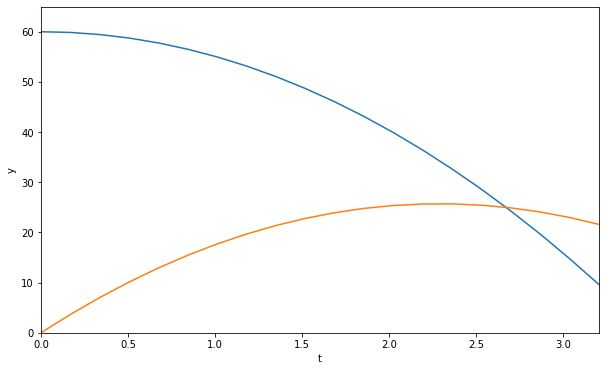

In [28]:
# Dibujando las ecuaciones
t_lin=np.linspace(0,int(t_sol*1.2*1e3)/1e3,num=20)

# Creamos el array y lo rellenamos de ceros
y_caida_graf  = np.zeros(len(t_lin))
y_subida_graf = np.zeros(len(t_lin))

# Ahora rellenamos el array con los valores que le corresponden
y_proyectil=y_proyectil.subs( {  v_proyectil_y_0: v_y_0 } )   # Se sustituye el valor para siempre
for  i in range(len(t_lin)):
    y_caida_graf[i]  = y_coche.subs(t,t_lin[i])
    y_subida_graf[i] = y_proyectil.subs(t,t_lin[i])

# Ahora definimos el tamaño del gráfico a más grande
plt.figure(figsize=(10,6))
# y delimitamos la región a representar => np.int() is deprecate, utilizar int()
plt.xlim(0,int(t_sol*1.2*1e3)/1e3)
plt.ylim(0,65)

# Introducimos leyendas
plt.xlabel('t')
plt.ylabel('y')

# Representamos las funciones
plt.plot(t_lin,y_caida_graf)
plt.plot(t_lin,y_subida_graf)
